<a href="https://colab.research.google.com/github/hexe007/pro_12/blob/main/ind2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Aim of the project: Implement the AI techniques to automate verification of produced sensors.
# Characteristics will be verified in order to configure by:
# Air, Water, Isopropanol

# Essential Exploratory data analysis (EDA),analyze and investigate data sets and summarize their main characteristics.
import pandas as pd
import numpy as np

In [4]:
# Plotting Packages, appealing plots to present data in the most simple and effective way.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing

In [5]:
# Machine Learning Packages
    #Matplotlib - for plotting data in graphs and charts
    #NLTK - natural language toolkit for working with text
    #pandas - the premier data analysis tool for Python
    #scikit-learn - simplifies the implementation of different algorithms
    #Seaborn - for making statistical graphs
    #Numpy - for multi-dimensional array and matrix processing
    #Keras - high-level API that greatly simplifies working with TensorFlow
    #SciPy - for easy handling of mathematical operations
    #PyTorch - simplifies the creation of neural networks using dynamic graphs
    #TensorFlow - simplifies the creation of neural networks using static graphs

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [89]:
#Load data from data source
#I am loading a txt files containig a mix data.
#I want to store them in an object where I can access each element.

path = 'https://raw.githubusercontent.com/hexe007/pro_12/main/sesion/'
prefix = 'sesion_'
ref = '_20'
extension = '.txt'

prefix_number = 10 #number of given file sets to be loaded, 2 digits with leading 0

medium_validation = np.array(['air', 'water', 'izopropanol']) #array of given validations medium
medium_collection = {}

for i in medium_validation:
  for x in range(prefix_number):
    i = str(i)
    x += 1
    x = str(x).zfill(2)
    url = path + prefix  + x + ref + '/sensor' + x + '_' + i + extension
    medium_collection[i, x] = pd.read_csv(url, names=['Amplitude', 'Wavelenght'])

medium_collection.keys()
medium_collection.items()

dict_items([(('air', '01'),       Amplitude  Wavelenght
0      0.000001      9.1792
1      0.000001      9.2003
2      0.000001      9.1968
3      0.000001      9.1028
4      0.000001      9.0601
...         ...         ...
2996   0.000002      3.8310
2997   0.000002      3.8613
2998   0.000002      3.8361
2999   0.000002      3.9466
3000   0.000002      3.8974

[3001 rows x 2 columns]), (('air', '02'),       Amplitude  Wavelenght
0      0.000001      9.7793
1      0.000001      9.8643
2      0.000001      9.8031
3      0.000001      9.7320
4      0.000001      9.6895
...         ...         ...
2996   0.000002      3.5505
2997   0.000002      3.8237
2998   0.000002      3.6708
2999   0.000002      3.8785
3000   0.000002      3.8886

[3001 rows x 2 columns]), (('air', '03'),       Amplitude  Wavelenght
0      0.000001      7.8831
1      0.000001      8.0971
2      0.000001      7.9478
3      0.000001      7.9979
4      0.000001      7.9220
...         ...         ...
2996   0.000002   

In [ ]:
df_sensor01_izopropanol= pd.read_csv('/content/sensor01_izopropanol.txt')
df_sensor01_izopropanol.head()

,1.35e-06,8.5551
0,0.000001,8.6750
1,0.000001,8.7116
2,0.000001,8.7157
3,0.000001,8.6792
4,0.000001,8.6312


In [ ]:
df_sensor01_water= pd.read_csv('/content/sensor01_water.txt')
df_sensor01_water.head()

,1.35e-06,8.357
0,0.000001,8.4287
1,0.000001,8.4422
2,0.000001,8.4144
3,0.000001,8.4034
4,0.000001,8.3351


In [ ]:
# View on: df_sensor01_air

In [ ]:
df_sensor01_air.describe()

,1.35e-06,9.1792
count,3.000000e+03,3000.000000
mean,1.500050e-06,1.187713
std,8.661697e-08,4.722722
min,1.350100e-06,-7.151200
25%,1.425075e-06,-2.635050
50%,1.500050e-06,1.615850
75%,1.575025e-06,4.879975
max,1.650000e-06,9.253300


In [ ]:
# To check for any missing values
df_sensor01_air.isna().sum()



1.35e-06    0
9.1792      0
dtype: int64

Non missing values

In [ ]:
df_sensor01_air.keys()

Index(['1.35e-06', '9.1792'], dtype='object')

In [ ]:
df_sensor01_air.values

array([[1.3501e-06, 9.2003e+00],
       [1.3502e-06, 9.1968e+00],
       [1.3503e-06, 9.1028e+00],
       ...,
       [1.6498e-06, 3.8361e+00],
       [1.6499e-06, 3.9466e+00],
       [1.6500e-06, 3.8974e+00]])

In [ ]:
df_sensor01_air.shape

(3000, 2)

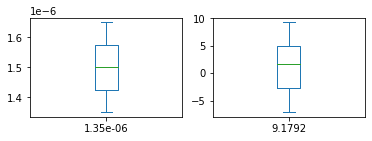

In [ ]:
df_sensor01_air.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

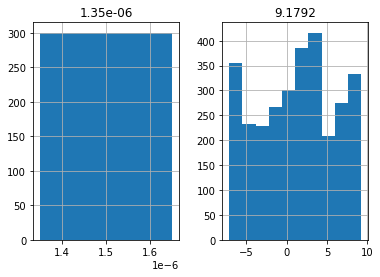

In [ ]:
# histograms using pandas plot
df_sensor01_air.hist()
plt.show()



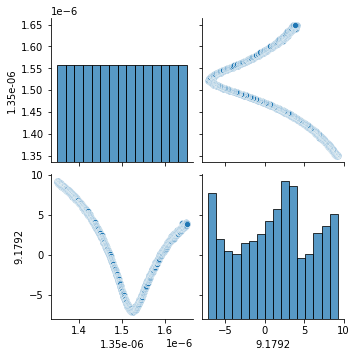

In [ ]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df_sensor01_air)


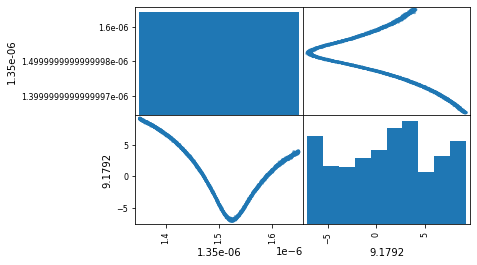

In [ ]:


# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df_sensor01_air)
plt.show()



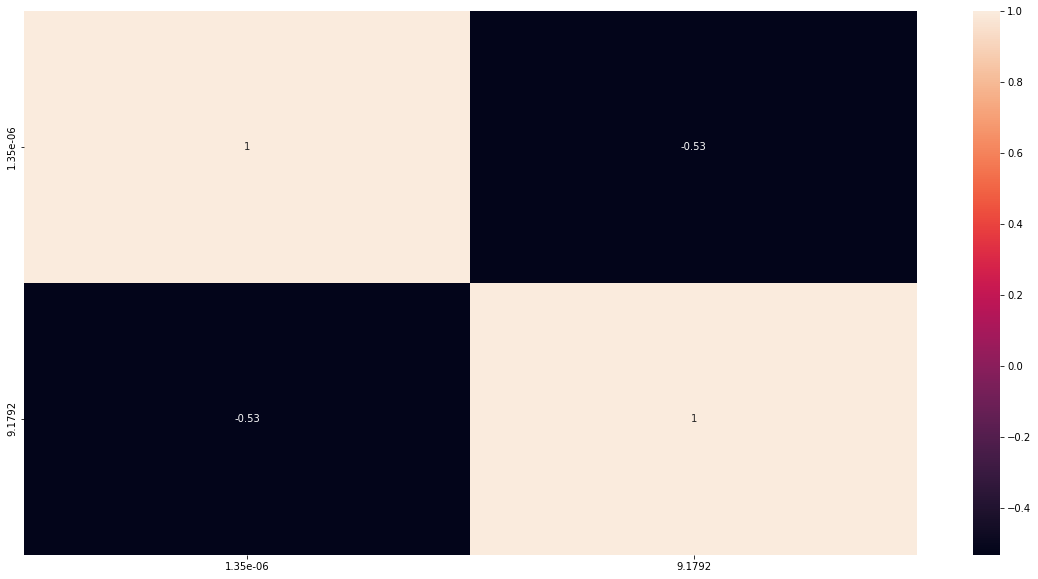

In [ ]:
plt.figure(figsize =(20,10))
sns.heatmap(df_sensor01_air.corr(), annot =True)

In [ ]:
# Split-out validation dataset
array = df_sensor01_air.values
x = array[:,0:1]
y = array[:,1]
x



array([[1.3501e-06],
       [1.3502e-06],
       [1.3503e-06],
       ...,
       [1.6498e-06],
       [1.6499e-06],
       [1.6500e-06]])

In [ ]:
y

array([9.2003, 9.1968, 9.1028, ..., 3.8361, 3.9466, 3.8974])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
x_train

array([[1.4196e-06],
       [1.3926e-06],
       [1.4664e-06],
       ...,
       [1.5226e-06],
       [1.5755e-06],
       [1.6416e-06]])

In [ ]:
y_train

array([ 5.2808,  7.0112,  0.8033, ..., -6.741 , -1.4584,  3.4499])

In [ ]:
x_test

array([[1.6400e-06],
       [1.6171e-06],
       [1.6275e-06],
       [1.5200e-06],
       [1.5434e-06],
       [1.4869e-06],
       [1.4818e-06],
       [1.5928e-06],
       [1.5060e-06],
       [1.4767e-06],
       [1.5758e-06],
       [1.4103e-06],
       [1.5762e-06],
       [1.5333e-06],
       [1.3848e-06],
       [1.4907e-06],
       [1.5932e-06],
       [1.3695e-06],
       [1.4292e-06],
       [1.5359e-06],
       [1.4296e-06],
       [1.6272e-06],
       [1.3548e-06],
       [1.3671e-06],
       [1.6034e-06],
       [1.4975e-06],
       [1.4817e-06],
       [1.6024e-06],
       [1.4771e-06],
       [1.6270e-06],
       [1.6490e-06],
       [1.4391e-06],
       [1.4889e-06],
       [1.3964e-06],
       [1.5263e-06],
       [1.5905e-06],
       [1.4853e-06],
       [1.4560e-06],
       [1.5332e-06],
       [1.4629e-06],
       [1.3779e-06],
       [1.5084e-06],
       [1.3501e-06],
       [1.3832e-06],
       [1.6437e-06],
       [1.3914e-06],
       [1.4691e-06],
       [1.630

In [ ]:
y_test

array([ 3.4191e+00,  2.1502e+00,  2.7845e+00, -6.6041e+00, -5.5461e+00,
       -2.3233e+00, -1.4843e+00,  3.9034e-01, -5.2402e+00, -8.3358e-01,
       -1.4998e+00,  5.9839e+00, -1.2070e+00, -6.6484e+00,  7.4988e+00,
       -2.9712e+00,  3.7969e-01,  8.3639e+00,  4.5552e+00, -6.2147e+00,
        4.4145e+00,  2.6990e+00,  8.9132e+00,  8.3237e+00,  1.1025e+00,
       -3.9731e+00, -1.5909e+00,  1.0537e+00, -8.9438e-01,  2.8925e+00,
        3.7538e+00,  3.6150e+00, -2.6154e+00,  6.8368e+00, -6.9074e+00,
        1.5141e-01, -2.0287e+00,  1.8214e+00, -6.5726e+00,  1.0464e+00,
        7.9746e+00, -5.6854e+00,  9.2003e+00,  7.4692e+00,  3.5876e+00,
        7.0977e+00,  3.0051e-01,  2.6949e+00, -1.0127e+00,  5.0221e+00,
        1.2426e+00,  8.4949e+00,  1.9585e+00,  7.0288e+00, -5.3267e+00,
        1.8126e+00,  5.5512e+00,  3.9742e+00, -4.9680e+00, -5.2510e+00,
        1.5750e+00,  3.6996e+00,  7.8898e+00, -5.4214e-01, -6.5715e+00,
       -3.3478e-01,  7.7580e+00, -5.0003e+00, -1.9528e+00, -2.52

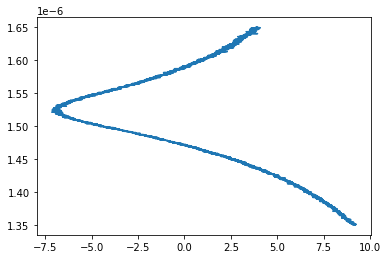

In [ ]:
df_sensor01_air

